In [1]:
%matplotlib inline

In [2]:
cd ..

/vol/atlas/homes/gt108/Projects/ibugface


In [3]:
import resnet_model
import tensorflow as tf
import data_provider
import menpo.io as mio
import menpo
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.platform import tf_logging as logging
from utils import caffe_preprocess, rescale_image
from menpo.image import Image

np.set_printoptions(3)
slim = tf.contrib.slim

In [4]:
nogpu_config = tf.ConfigProto(
    # Do not use a GPU device
    device_count = {'GPU': 0}
)

sess = tf.Session(config=nogpu_config)

In [5]:
images = tf.placeholder(tf.float32, shape=(None, None, 3))

In [6]:
# Define model graph.
with tf.variable_scope('net'):
    with slim.arg_scope([slim.batch_norm, slim.layers.dropout],
                        is_training=False):
        prediction, states = resnet_model.svs_regression_net_light(images[None, ...])

In [99]:
variables_to_restore = slim.get_variables_to_restore()
saver = tf.train.Saver(variables_to_restore)
model_path = slim.evaluation.tf_saver.get_checkpoint_state('ckpt/train_svs').model_checkpoint_path
saver.restore(sess, model_path)
print(model_path)

ckpt/train_svs/model.ckpt-92254


In [118]:
original_image = mio.import_images('/vol/atlas/databases/body/SupportVectorBody/crop-highres/*.jpg', normalize=False)[1001]
# original_image = original_image.crop_to_landmarks_proportion(.2)
input_pixels = caffe_preprocess(original_image)

In [100]:
original_image = mio.import_images('/vol/atlas/databases/body/Microsoft_COCO/people2014//', normalize=False)[12]
original_image = original_image.rescale_to_diagonal(450)
input_pixels = caffe_preprocess(original_image)

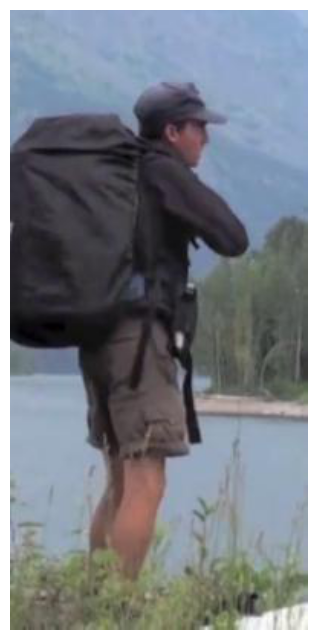

In [119]:
%matplotlib inline
original_image.view()

In [120]:
*estimated_svs, image = sess.run([states, images], feed_dict={images: input_pixels.transpose(1, 2, 0)})

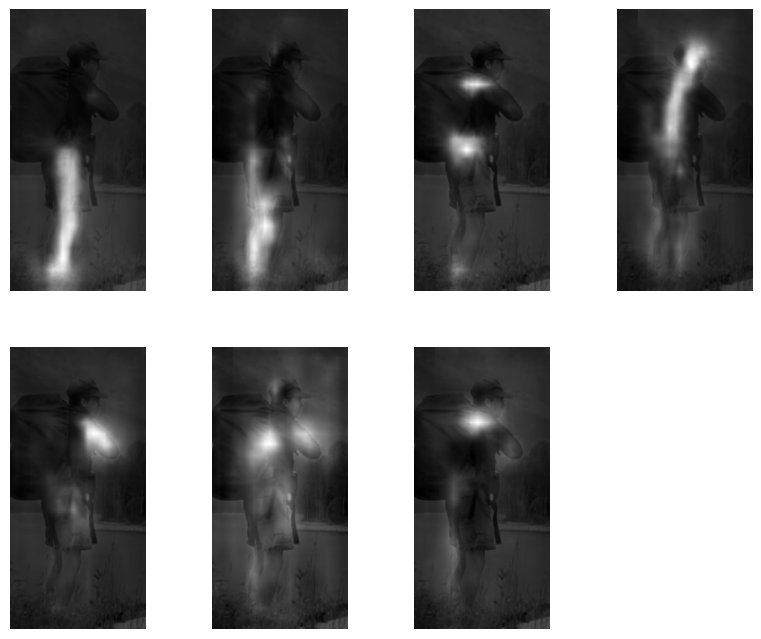

In [121]:
%matplotlib inline

svs = Image.init_from_channels_at_back(estimated_svs[0][-1][0] + original_image.pixels[0][..., None]*.001)
svs.view(channels='all')

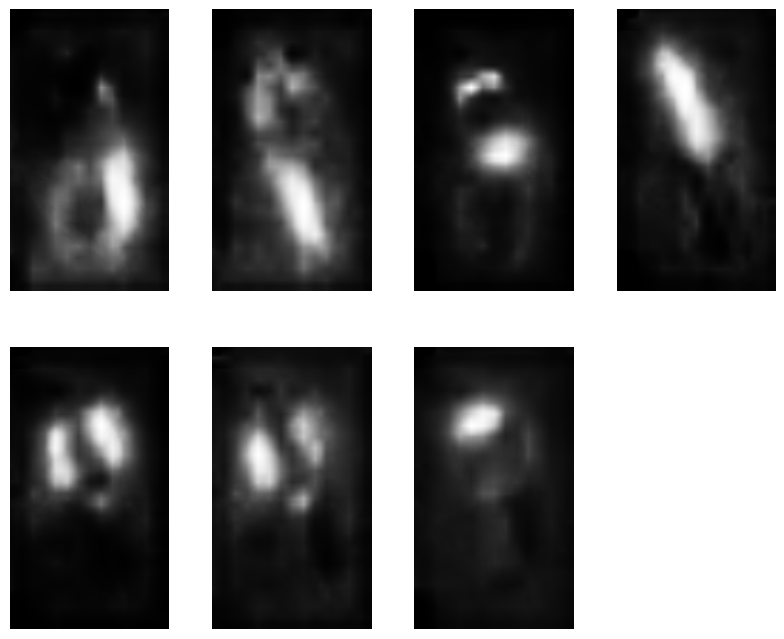

In [117]:
%matplotlib inline

svs = Image.init_from_channels_at_back(estimated_svs[0][0][0])
svs.view(channels='all')